In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [34]:
#Warning's will not be displayed in the output.
filterwarnings("ignore")

#Set the seed.
seed = 42
np.random.seed(seed)

# Set the test size.
test_set_size = 0.2

## Some dictionaries that are used in the analysis:
binary_dict = {0:"No",1:"Yes"}
seasons_dict = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

year_dict = {0:"2018",1:"2019"}

month_dict = month = {1:'Jan',
		2:'Feb',
		3:'Mar',
		4:'Apr',
		5:'May',
		6:'Jun',
		7:'July',
		8:'Aug',
		9:'Sep',
		10:'Oct',
		11:'Nov',
		12:'Dec'}

day_dict = {6:"Mon", 0:"Tues", 1:"Wed", 2:"Thurs", 3:"Fri", 4:"Sat", 5:"Sun"}

weather_dict = {1:"Clear",2:"Mist",3:"Light Snow", 4:"Heavy Snow"}

In [35]:
master  = pd.read_csv("day.csv")
master = master.drop(["instant"],axis=1)
master.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Missing Value Treatment:

In [36]:
print(master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB
None


**Conclusion** : <br>
There are no missing values to be dealth with.

### Data Processing

<h4>Data Dictionary:</h4>

The following data dictionary was provided by the company: <br>

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

For EDA purposes we need to create and change a few columns:
- Few columns have been changed to *Category* datatype.
- The values from the data dictionary has been replaced with easily readable labels.

In [37]:
# Make a copy of the dataframe for EDA purposes.
data = pd.DataFrame.copy(master)

#dtday: Covert to datetime object.
data["dteday"] = pd.to_datetime(data["dteday"])

#Convert to category dtype:
category_vars = ["weekday","mnth","season","weathersit","holiday","workingday"]
for var in category_vars:
    data[var] = data[var].astype("category")

# Seasons: 
data["season"]  = data["season"].replace(seasons_dict)

#year
data["yr"] = data["yr"].replace({0:"2018",1:"2019"})

#Month:
data["mnth"] = data["mnth"].replace(month_dict)

#weekday
data["weekday"] = data["weekday"].replace(day_dict)

#WorkingDay
data['workingday'] = data["workingday"].replace({0:"No",1:"Yes"})

#Weather Situation
data['weathersit'] = data["weathersit"].replace(weather_dict)

#drop the dteday column as it is unnecessary:
data.drop("dteday",axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,0,Mon,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,0,Tues,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,0,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,0,Thurs,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,0,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Outliers Analysis:

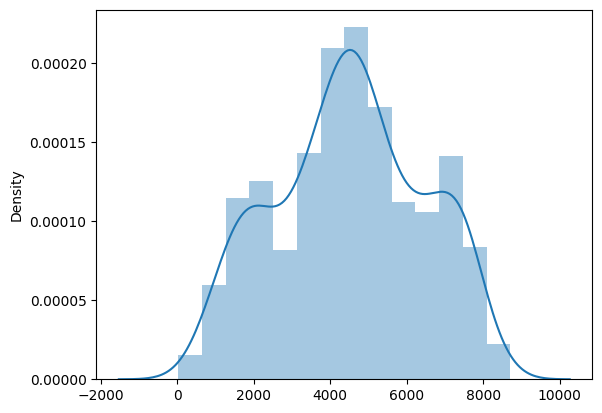

In [38]:
sns.distplot(x=data["cnt"]);

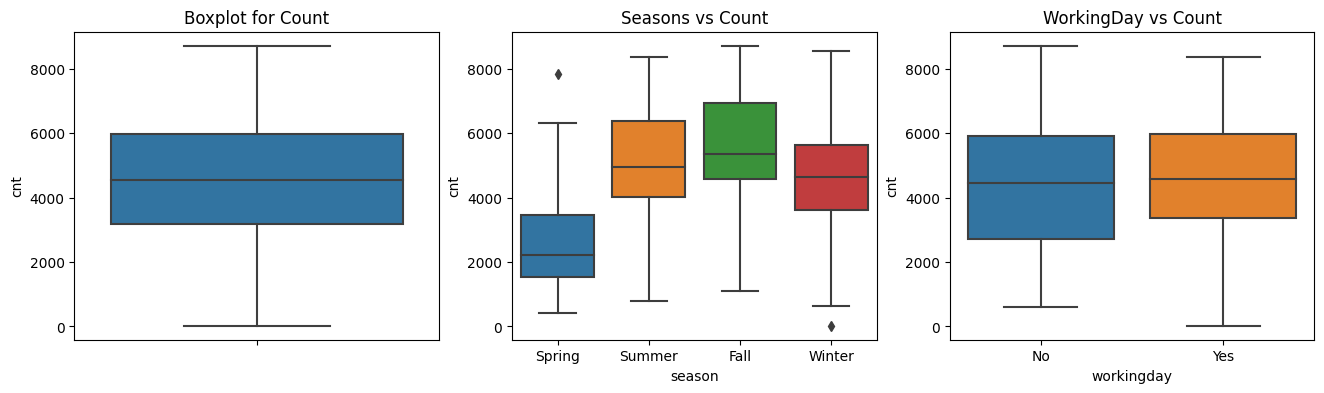

In [39]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.boxplot(data=data,y="cnt",ax=ax[0])
ax[0].set_title("Boxplot for Count")

sns.boxplot(data=data,y="cnt",x="season",ax=ax[1])
ax[1].set_title("Seasons vs Count")

sns.boxplot(data=data,y="cnt",x="workingday",ax=ax[2])
ax[2].set_title("WorkingDay vs Count")

plt.show()

*Conclusion* :<br>
- Spring season has lower usage count for bikes.
- The medians for Working Day or Non-Working is similar.

### Correlation Analysis:

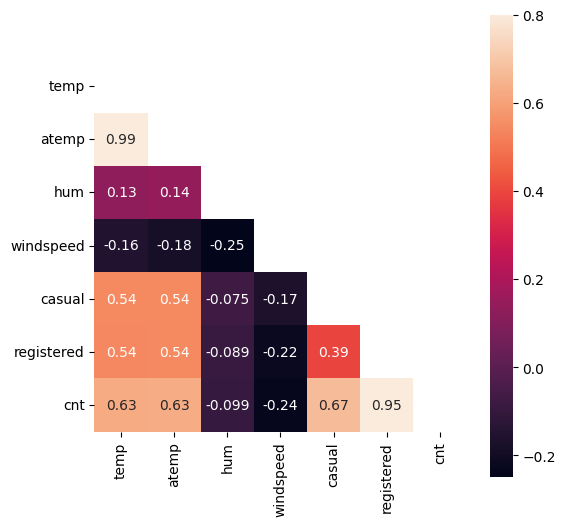

In [40]:
corr = data[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True,mask=mask,square=True,vmax=0.8);

**Conclusion** : <br>
- *casual* and  *registered* are highly correlated to *cnt* (the target variable), thus they can be dropped.
- *temp* and *atemp* are also highly correlated, thus either one can be dropped for modelling.

<h3> Anaylsis of Count <h4>

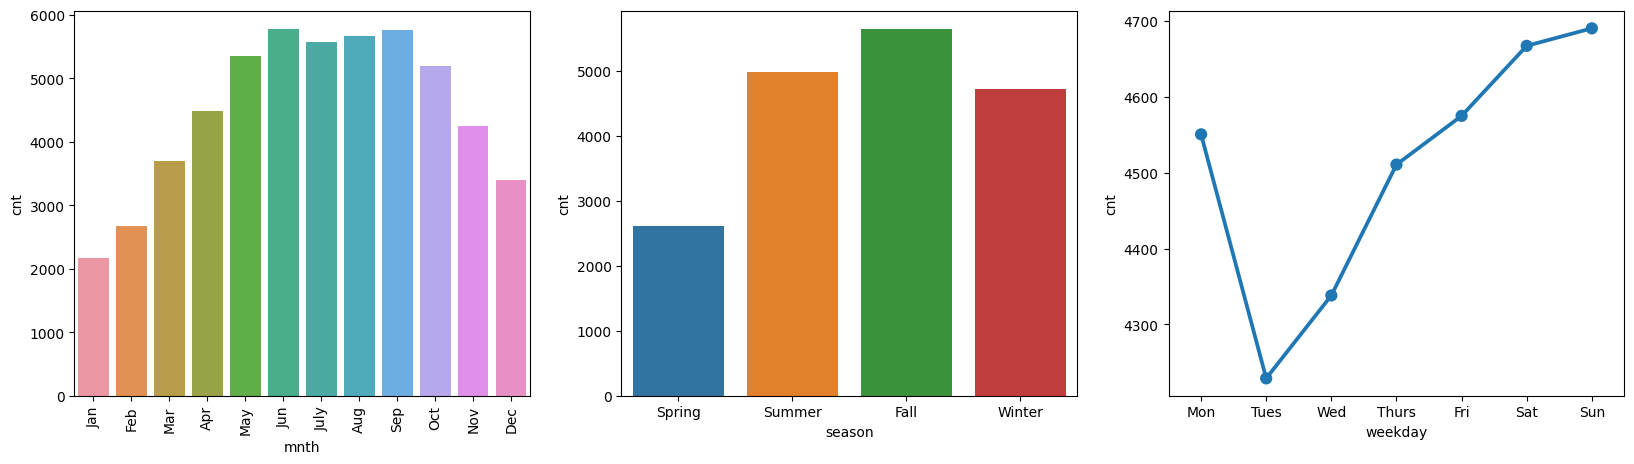

In [41]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

monthAggregated = pd.DataFrame(data.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
# plt.xticks(rotation=90)
# plt.title("Count vs Month")
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90)
sns.barplot(data=monthSorted,x="mnth",y="cnt",ax=ax[0]);


seasonAggregated = pd.DataFrame(data.groupby("season")["cnt"].mean()).reset_index()
seasonSorted = seasonAggregated.sort_values(by="cnt",ascending=False)
# plt.xticks(rotation=90)
# plt.title("Count vs Seasons")
sns.barplot(data=seasonSorted,x="season",y="cnt",ax=ax[1]);

weekdayAggregated = pd.DataFrame(data.groupby("weekday")["cnt"].mean()).reset_index()
weekdaySorted = weekdayAggregated.sort_values(by="cnt",ascending=False)
# plt.xticks(rotation=90)
# plt.title("Count vs Day of the Week")
sns.pointplot(data=weekdaySorted,x="weekday",y="cnt",ax=ax[2],order=list(day_dict.values()));

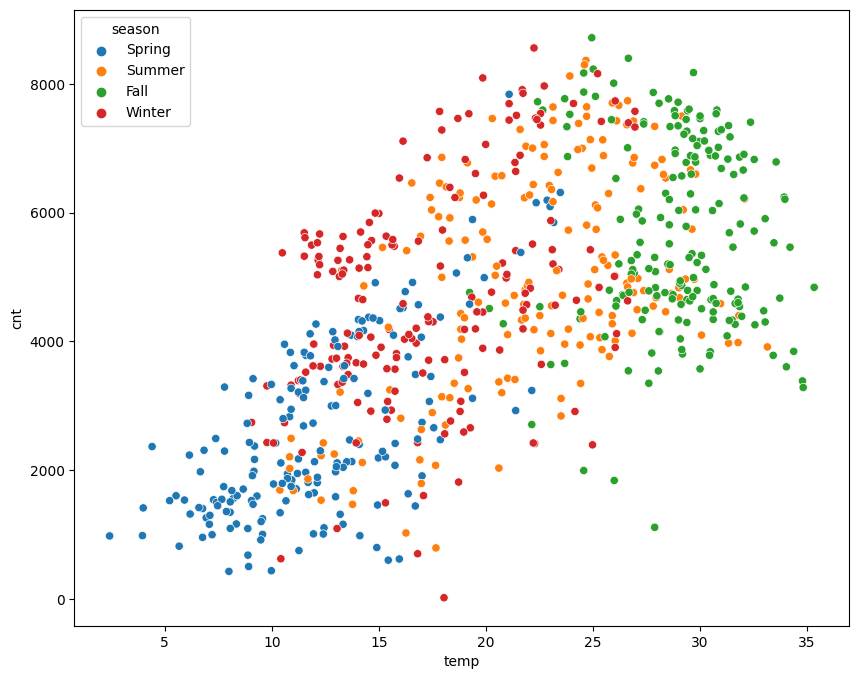

In [42]:
# Temperature vs Count
plt.figure(figsize=(10,8))
sns.scatterplot(x=data["temp"],y=data["cnt"],hue=data["season"]);

**Conclusion** : <br>
- The months of May to September sees the highest demand of bikes. 
- This corresponds to pleasure temperature range of 20&deg;C to 30&deg;C
- Saturday and Sunday sees the highest demand per week. This kind of goes against logic that weekdays would see more demand due to work/school hours.
- It is surprisingly odd that Tuesday sees the lowest number of demand, irrespective of the similar count of values in the dataset. 

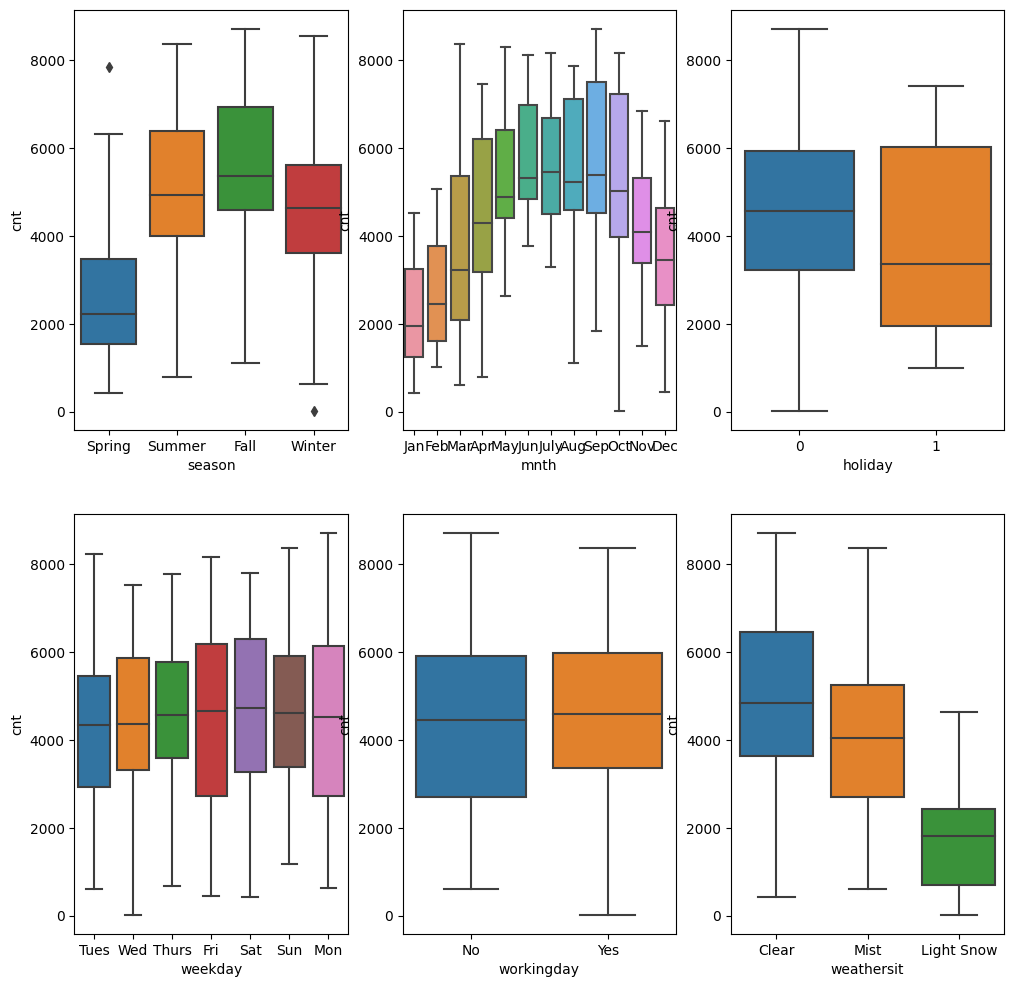

In [43]:
# Boxplots to check Target variable (Count) against other categorical predictors:
categorical_vars = ['season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(12, 12))
for i in enumerate(categorical_vars):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

---

## Data Modelling

We will begin the modelling processby dropping the unnecessary columns from the main dataset:

| Column | Reason |
| ----------- | ----------- |
| dteday | Unnecessary as we have built the new features from it |
| Temp | Highly correlated to 'atemp' (temperature that user feels). <br>Keeping 'atemp' is logical as user will decide if they want to get a bike or not<br>based on what temperature they feel |
|Casual and Registered| These columns are highly correlated to the *cnt* as *cnt* is total sum of these two columns.|

In [44]:
master = master.drop(["dteday","temp","casual","registered"],axis=1)
master.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [45]:
#Convert to category dtype:
category_vars = ["weekday","mnth","season","weathersit","holiday","workingday"]
for var in category_vars:
    master[var] = master[var].astype("category")

# Seasons: 
master["season"]  = master["season"].replace(seasons_dict)

# Year:
master["yr"]  = master["yr"].replace(year_dict)

#Month:
master["mnth"] = master["mnth"].replace(month_dict)

#weekday
master["weekday"] = master["weekday"].replace(day_dict)

#Weather Situation
master['weathersit'] = master["weathersit"].replace(weather_dict)

#WorkingDay and holiday
master['workingday'] = master["workingday"].replace(binary_dict)
master['holiday'] = master["holiday"].replace(binary_dict)

master.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Mist,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tues,No,Mist,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Clear,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thurs,Yes,Clear,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Clear,11.46350,43.6957,12.522300,1600


In [52]:
cat_vars = ["season","yr","mnth","holiday","weekday","workingday"]
df = pd.get_dummies(master,columns=cat_vars,drop_first=True)
df = pd.get_dummies(df,columns=["weathersit"])
df.head()

,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,yr_2019,mnth_Feb,mnth_Mar,...,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,workingday_Yes,weathersit_Clear,weathersit_Mist,weathersit_Light Snow
0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
